In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [4]:
df = pd.read_csv("datasets/ToyotaCorolla - MLR.csv")

In [5]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### Data summary

In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
df['Cylinders'].value_counts() 
#df['Cylinders'].nunique()

Cylinders
4    1436
Name: count, dtype: int64

In [9]:
df.drop(columns='Cylinders',inplace=True)   # since cylinders column has distinct value i.e 4
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight'],
      dtype='object')

In [10]:
df['Fuel_Type'].value_counts()   # counting Fuel_Type by grouping

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [11]:
df.isnull().sum()     # finding if there are any null values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [12]:
data = pd.get_dummies(df)    # converting categorical data

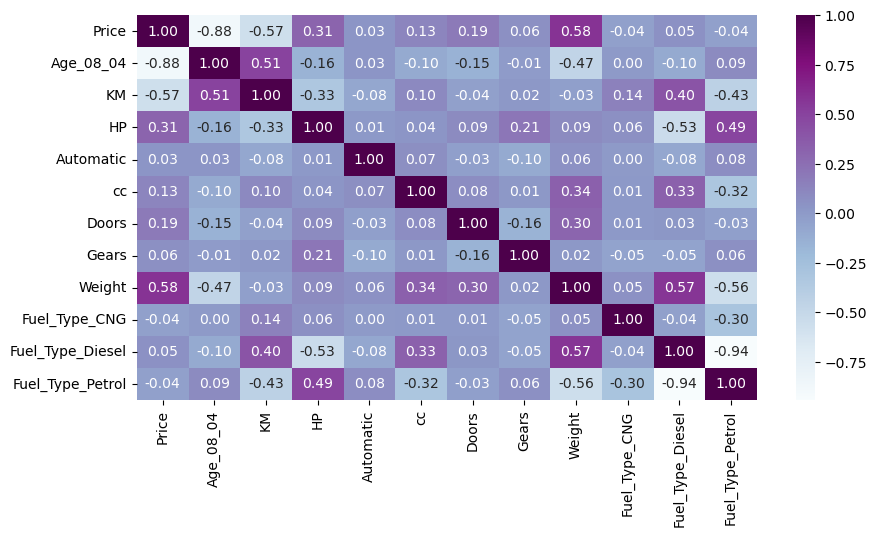

In [13]:
plt.figure(figsize=(10,5))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BuPu')
plt.show()

#### Vizualizations

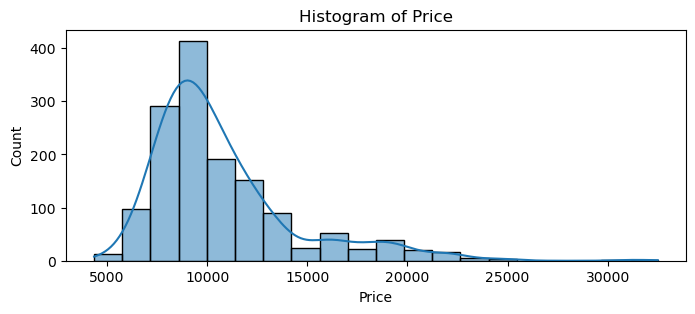

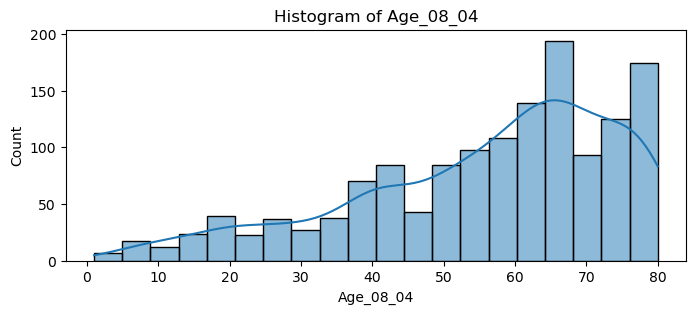

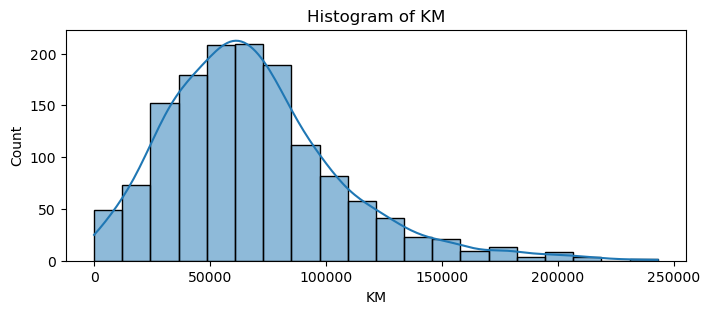

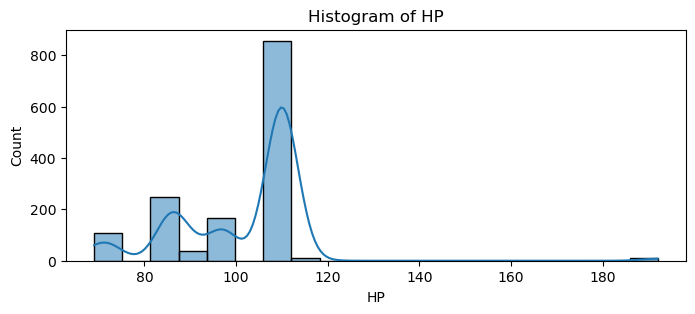

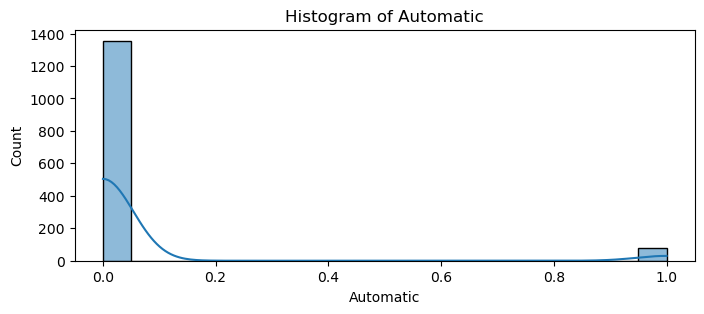

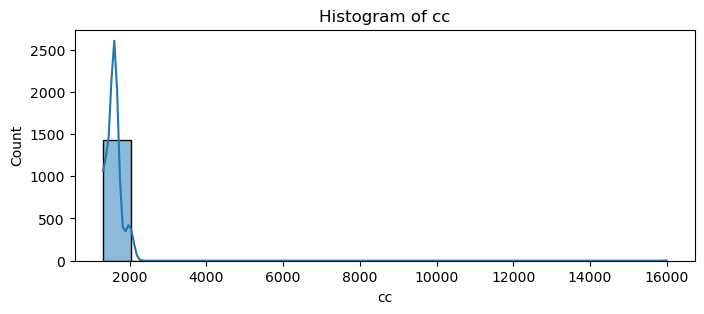

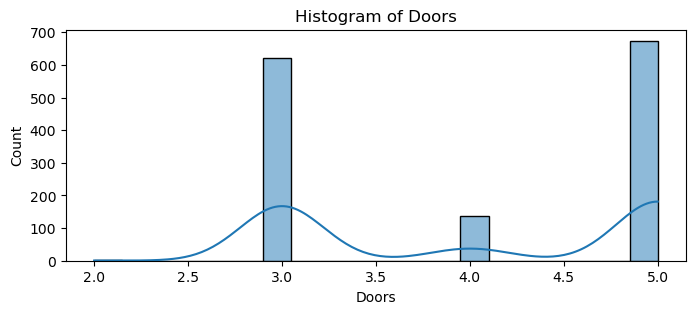

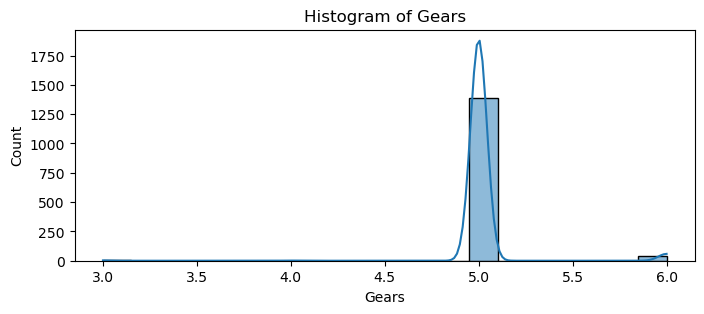

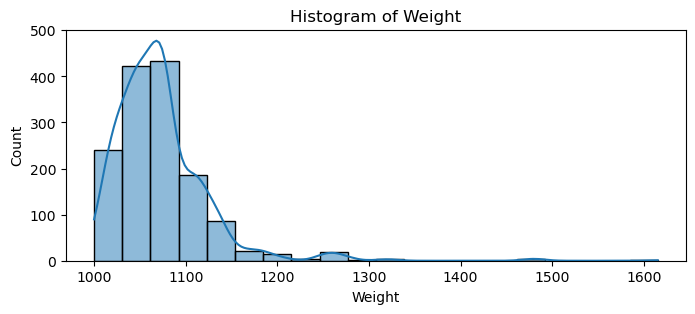

In [15]:
#sns.pairplot(data)
#plt.show()
variables = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']
for var in variables:
    plt.figure(figsize=(8,3))    
    sns.histplot(data[var],kde=True,bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.show()

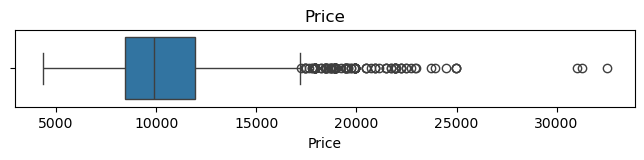

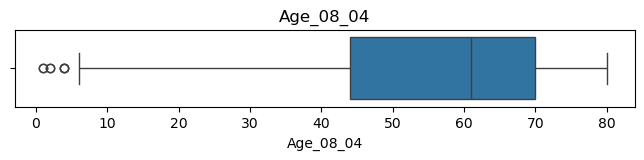

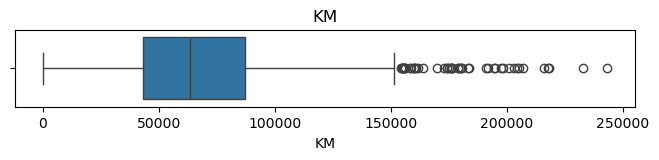

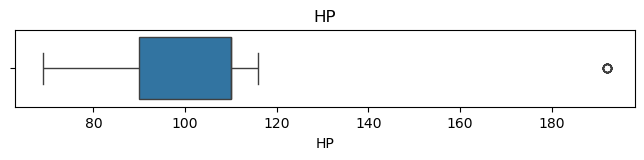

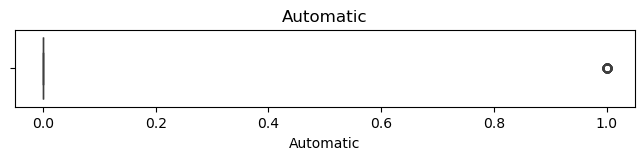

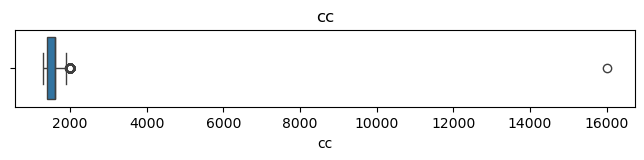

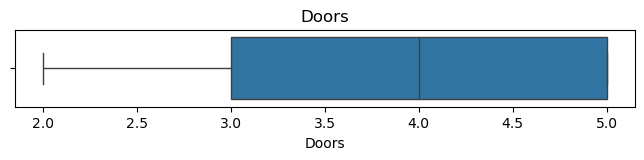

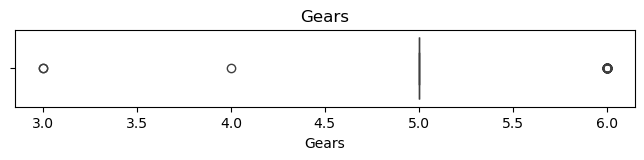

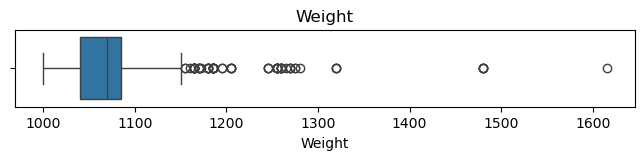

In [16]:
variables = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']
# boxplot to understand outliers
for var in variables:    
    plt.figure(figsize=(8,1))
    sns.boxplot(data[var],orient='h')
    plt.title(var)
    plt.show()

#### Replacing outliers with nearest whiskers

In [18]:
def outlier_limits(var):
    Q1 = np.percentile(data[var],25)
    Q3 = np.percentile(data[var],75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
      
    return upper_limit, lower_limit    

In [19]:
def check_outliers(var):
    
    upper_w, lower_w = outlier_limits(var) 
    
    if data[( data[var] > upper_w  )|( data[var] < lower_w  )].shape[0]:
        treat_outliers(var, upper_w, lower_w)            

In [20]:
def treat_outliers(var, upper_limit, lower_limit):      
           
    if data[  data[var] < lower_limit ].shape[0]:        
        data.loc[ data[var] < lower_limit, var ] = lower_limit
        
    if data[  data[var] > upper_limit ].shape[0]:        
        data.loc[ data[var] > upper_limit, var ] = upper_limit
        
        #result = np.where(arr > 20, 1, 0)

In [21]:
variables = ['Price','Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']
for var in variables:    
    check_outliers(var)

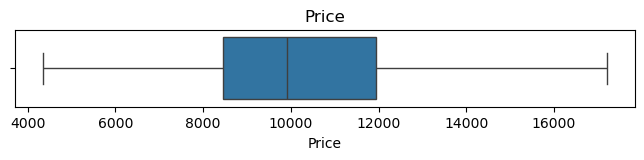

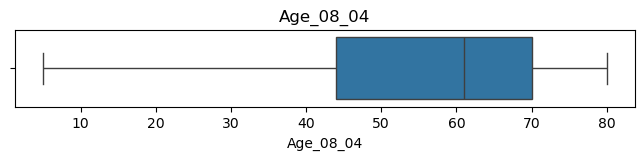

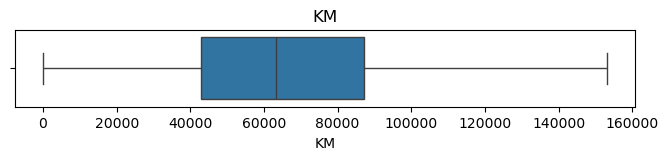

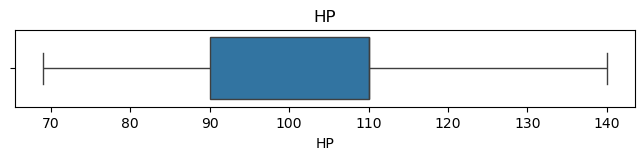

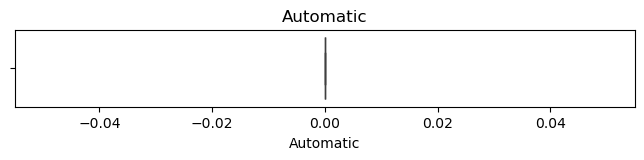

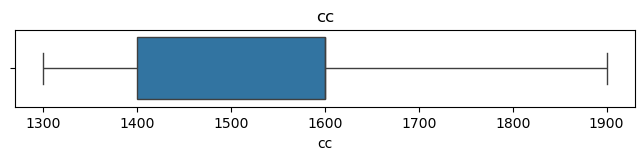

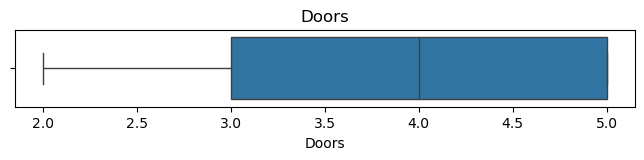

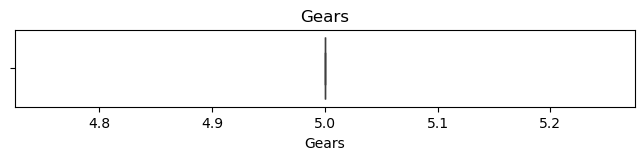

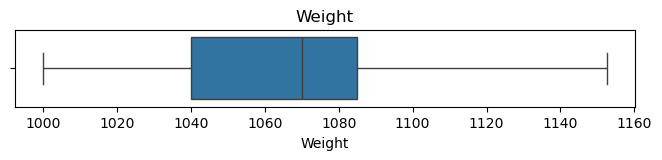

In [22]:
variables = ['Price','Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']
for var in variables:    
    plt.figure(figsize=(8,1))
    sns.boxplot(data[var],orient='h')
    plt.title(var)
    plt.show()

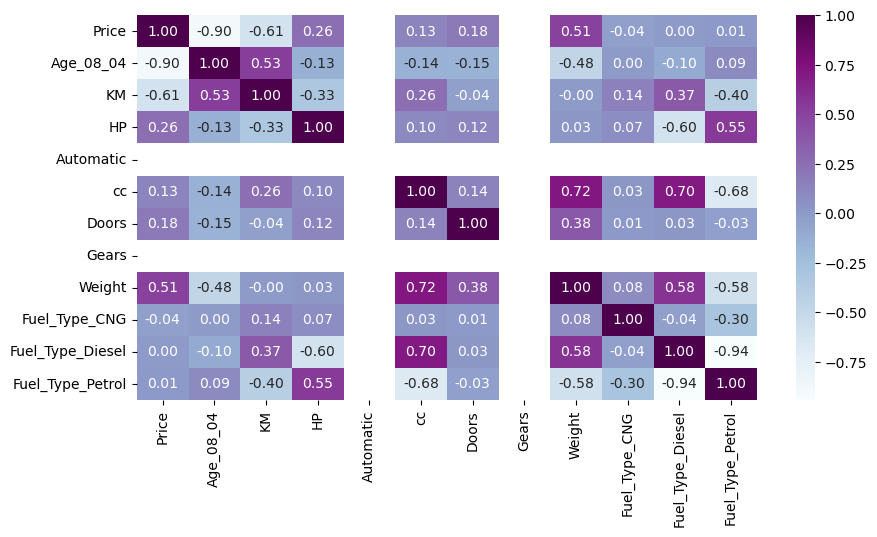

In [23]:
plt.figure(figsize=(10,5))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BuPu')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [25]:
x = data.iloc[:,1:] # independent variables
y = data['Price']  # dependent variables

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   # split the data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1148, 11), (288, 11), (1148,), (288,))

In [27]:
model = LinearRegression()   
model.fit(x,y)    #fit the model

LinearRegression()

In [28]:
model_params = pd.DataFrame()
model_params['features'] = x.columns
model_params['LReg'] = model.coef_

#### Evaluation metrics for training data

In [30]:
y_train

899      9500
881      9795
310     12950
1145     6450
31      15750
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1148, dtype: int64

In [31]:
yhat_train = model.predict(x_train)   # predict for training data
yhat_train

array([ 9304.87962914,  8645.48044925, 12973.82899756, ...,
        7961.35337952,  8962.29191698,  6654.07147096])

In [32]:
train_mse = mean_squared_error(y_train,yhat_train)
train_rmse = root_mean_squared_error(y_train,yhat_train)
train_score = r2_score(y_train,yhat_train)

np.round(train_mse,3), np.round(train_rmse,3), np.round(train_score,3)

(1192171.884, 1091.866, 0.867)

#### Evaluation metrics for testing data

In [34]:
yhat_test = model.predict(x_test)    # predict for testing data

In [35]:
test_mse = mean_squared_error(y_test,yhat_test)
test_rmse = root_mean_squared_error(y_test,yhat_test)
test_score = r2_score(y_test,yhat_test)

np.round(test_mse,3), np.round(test_rmse,3), np.round(test_score,3)

(1175502.847, 1084.206, 0.863)

### Lasso Regression

In [37]:
lasso = Lasso(alpha=0.1)
lasso.fit(x,y)
model_params['Lasso'] = lasso.coef_

In [38]:
lasso_yhat_train = lasso.predict(x_train)

lasso_train_mse = mean_squared_error(  y_train, lasso_yhat_train)
lasso_train_rmse = root_mean_squared_error( y_train, lasso_yhat_train)
lasso_train_score = r2_score( y_train, lasso_yhat_train)

np.round(lasso_train_mse,3), np.round(lasso_train_rmse,3), np.round(lasso_train_score,3)

(1192179.731, 1091.87, 0.867)

In [39]:
lasso_yhat_test = model.predict(x_test)

lasso_test_mse = mean_squared_error( y_test, lasso_yhat_test)
lasso_test_rmse = root_mean_squared_error( y_test, lasso_yhat_test)
lasso_test_score = r2_score( y_test, lasso_yhat_test)

np.round(lasso_test_mse,3), np.round(lasso_test_rmse,3), np.round(lasso_test_score,3)

(1175502.847, 1084.206, 0.863)

### Ridge Regression

In [41]:
ridge = Ridge(alpha=1.0)
ridge.fit(x,y)
model_params['Ridge'] = ridge.coef_

In [42]:
ridge_yhat_train = ridge.predict(x_train)

ridge_train_mse = mean_squared_error(  y_train, ridge_yhat_train)
ridge_train_rmse = root_mean_squared_error( y_train, ridge_yhat_train)
ridge_train_score = r2_score( y_train, ridge_yhat_train)

np.round(ridge_train_mse,3), np.round(ridge_train_rmse,3), np.round(ridge_train_score,3)

(1192247.658, 1091.901, 0.867)

In [43]:
ridge_yhat_test = model.predict(x_test)

ridge_test_mse = mean_squared_error( y_test, ridge_yhat_test)
ridge_test_rmse = root_mean_squared_error( y_test, ridge_yhat_test)
ridge_test_score = r2_score( y_test, ridge_yhat_test)

np.round(ridge_test_mse,3), np.round(ridge_test_rmse,3), np.round(ridge_test_score,3)

(1175502.847, 1084.206, 0.863)

### Q1] What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are feature scaling technuques to prepare data 
for better performance by ensuring the features contribute equally and prevent bias from scaled differences

<u><b>Nomalization</b></u> rescales the features to a fixed range i.e [0 to 1] or [-1 to 1]

<u><b>Standardization</b></u> transforms the data to have a mean of 0 and standard devistion of 1 

### Q2] What techniques can be used to address multicollinearity in multiple linear regression?

<u><b>Multicollinearity </u></b> occures when two or more independent(x) variables are correlated.

Techniques to address multicollinearity:


1. correlation matrix

2. calculate VIF (variance inflation factor)

3. PCA (princial component analysis)

4. ridge and lasso regression

5. domain knowledge based feature selection

6. scaling